In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import pandas as pd
ads = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
ads.shape

(200, 4)

In [4]:
ads.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
ads.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

--- Grapics ---


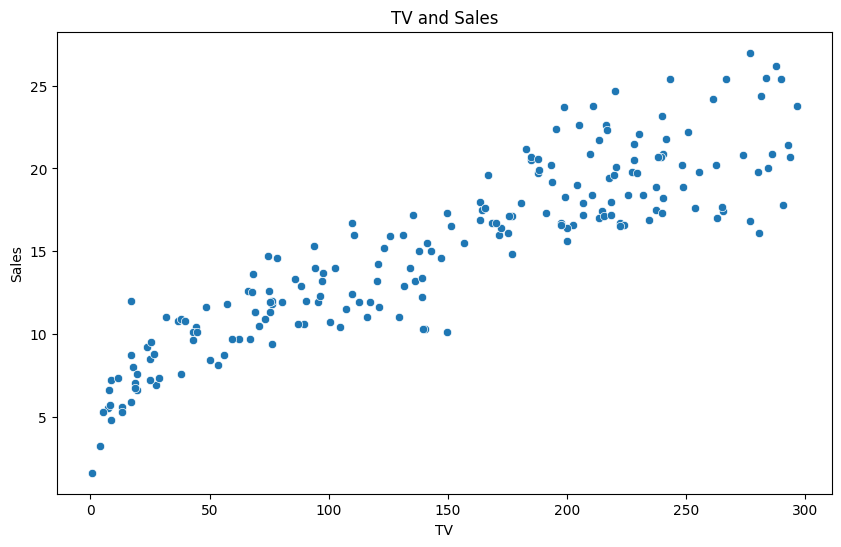

In [6]:
#finding proportion of TV versus Sales

plt.figure(figsize=(10,6))
sns.scatterplot(data=ads, x='TV', y='Sales', )
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV and Sales')
plt.show()

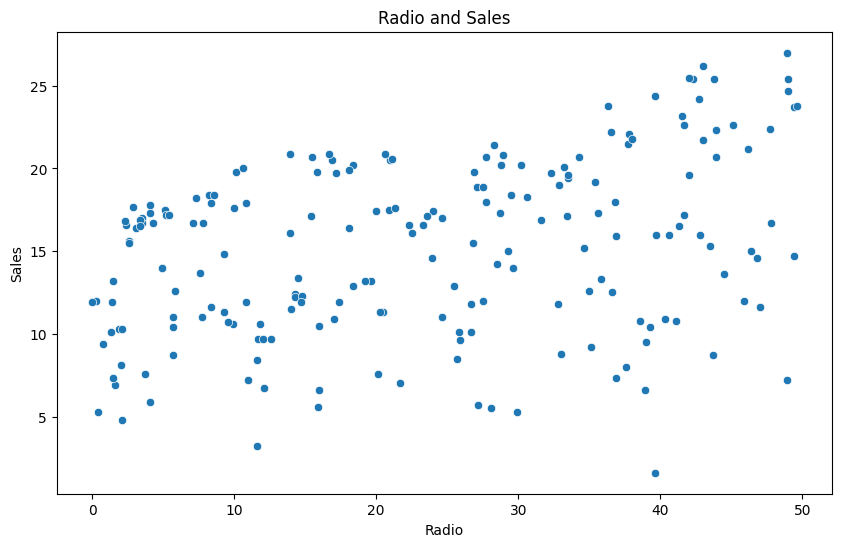

In [7]:
#finding proportion of Radio versus Sales

plt.figure(figsize=(10,6))
sns.scatterplot(data=ads, x='Radio', y='Sales', )
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Radio and Sales')
plt.show()

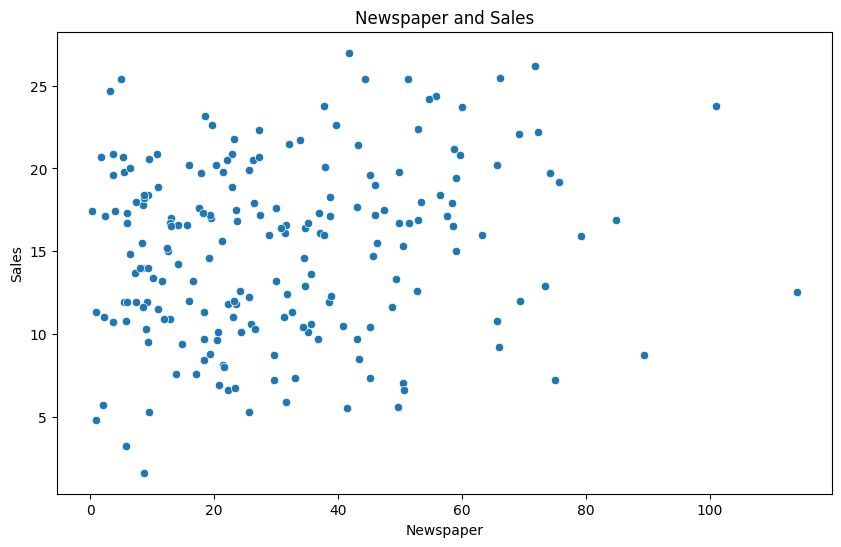

In [8]:
#finding proportion of Newspaper versus Sales

plt.figure(figsize=(10,6))
sns.scatterplot(data=ads, x='Newspaper', y='Sales', )
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Newspaper and Sales')
plt.show()

--- Linear regression ---

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(ads, test_size=0.1, random_state=42)

In [10]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['TV']])
y_train = np.asanyarray(train_set[['Sales']])

# Train the model
LR_model.fit(x_train, y_train)

#Find theta1 va theta0
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print (f'{theta1=}')
print (f'{theta0=}')

theta1=0.05513263076693964
theta0=7.044916461655207


Text(0, 0.5, 'Price')

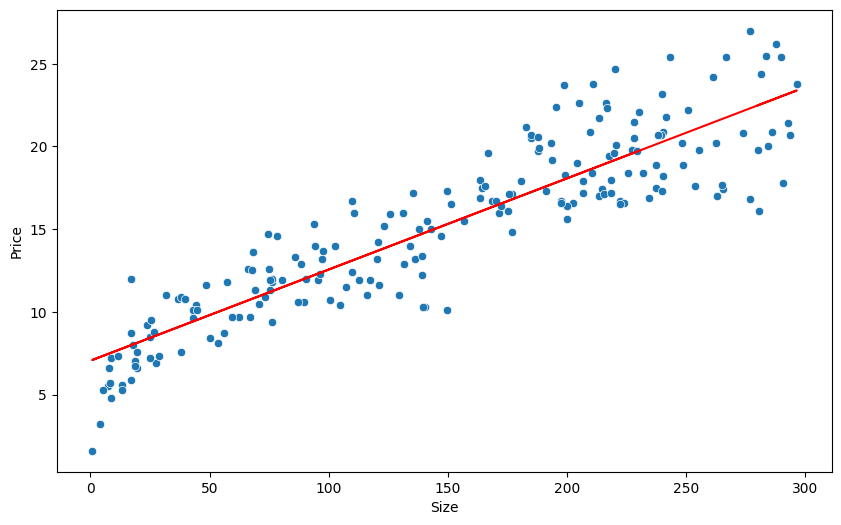

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=ads, x='TV', y='Sales')

y_train = theta0 + theta1*x_train

plt.plot(x_train, y_train, '-r')
plt.xlabel("Size")
plt.ylabel("Price")

--- Testing the model ---


In [12]:
x_test = np.asanyarray(test_set[['TV']])
y_test = np.asanyarray(test_set[['Sales']])

y_predict = LR_model.predict(x_test)

In [16]:
y_predict

array([[16.04807507],
       [17.81783251],
       [23.19326401],
       [ 7.68996824],
       [19.19063502],
       [11.18537703],
       [18.99767081],
       [ 9.801548  ],
       [19.30641354],
       [16.69864011],
       [ 8.78159433],
       [10.14337031],
       [19.97351838],
       [ 7.34263267],
       [14.73591845],
       [16.42849022],
       [ 7.44738467],
       [17.9391243 ],
       [11.19640356],
       [20.13340301]])

--- Finding MAE and RMSE ---

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"{MAE=}")
print(f"{RMSE=}")

MAE=2.037955356968121
RMSE=2.5103822386472214
